In [31]:
import pandas as pd
from Stocks import Stock
import plotter as plot
import matplotlib.pyplot as plt
import yaml
import sys
from pathlib import Path
import distributions as dt
import returns as rt


def read_yaml(file_name): 
    with open(file_name) as file:
        yaml_data= yaml.safe_load(file)
    return yaml_data

config = read_yaml('config.yaml')
# config['canadian_etfs_parsed']
canadian_etfs_parsed = config['canadian_etfs_parsed']
canadian_etfs_parsed

['VFV.TO']

In [32]:
dji_df = Stock('DJIA', '2021-10-01', '2023-03-01')
# dji_df.ticker_data['ticker'] = 'DJIA'

spy_df= Stock('SPY', '2021-10-01', '2023-03-01')
# spy_df.ticker_data['ticker'] = 'SPY'

qqq_df = Stock('QQQ', '2021-10-01', '2023-03-01')
# qqq_df.ticker_data['ticker'] = 'QQQ'

data from alpaca
data from alpaca
data from alpaca


In [33]:
df = pd.concat([dji_df.ticker_data, spy_df.ticker_data, qqq_df.ticker_data])
df.head()

,Open,High,Low,Close,Volume,ticker,pct_change,Cumulative_Percentage_Change,normalized_close,cumulative_mean_normalized_close,cumulative_variance_normalized_close,cumulative_std_normalized_close
2022-02-24,23.78,24.0200,23.6500,24.0200,22738,DJIA,NaN,0.000000,0.697382,0.697382,0.000000,0.000000
2022-02-25,24.41,24.5814,24.1900,24.5814,26826,DJIA,0.023372,2.337219,0.802910,0.750146,0.002784,0.052764
2022-02-28,24.67,24.6700,24.4400,24.5981,4076,DJIA,0.000679,2.406744,0.806049,0.768780,0.002551,0.050503
2022-03-01,24.78,24.7800,24.2200,24.2721,8225,DJIA,-0.013253,1.049542,0.744770,0.762777,0.002021,0.044955
2022-03-02,24.65,24.7100,24.4198,24.6600,14268,DJIA,0.015981,2.664446,0.817685,0.773759,0.002099,0.045817


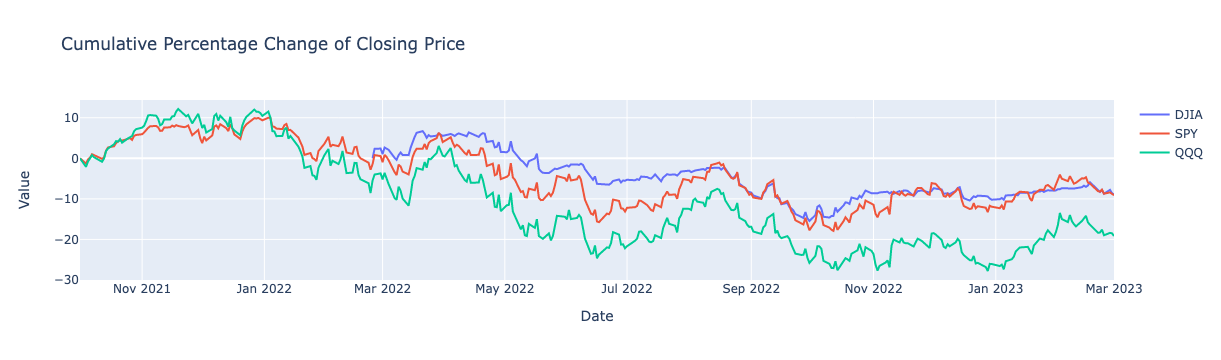

In [34]:
plot.plot_column_across_tickers(df, col_name = 'Cumulative_Percentage_Change', title='Cumulative Percentage Change of Closing Price')

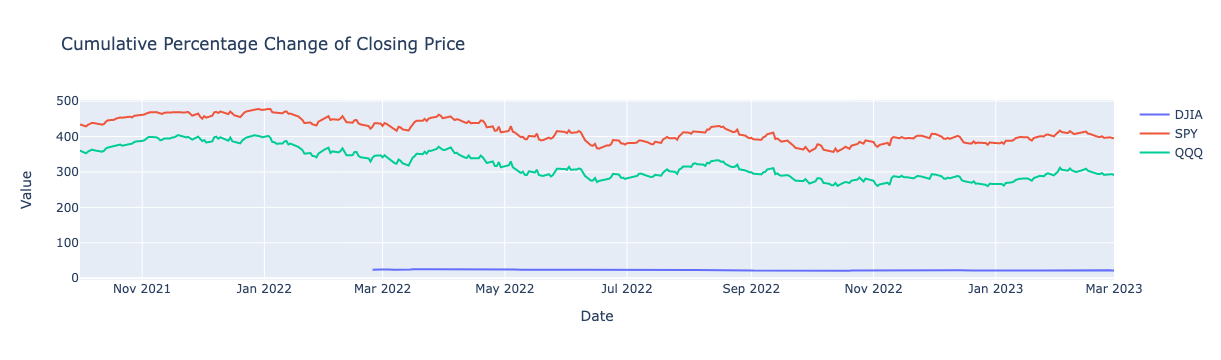

In [35]:
plot.plot_column_across_tickers(df, col_name = 'Close', title='Cumulative Percentage Change of Closing Price')

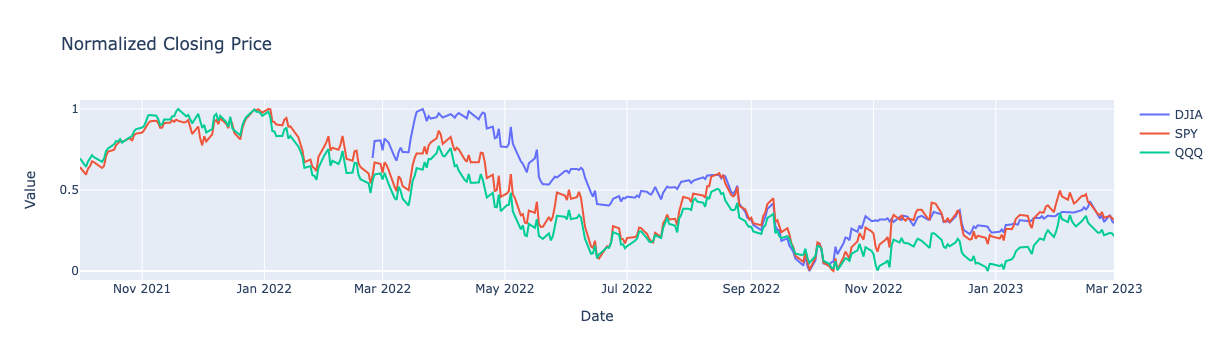

In [36]:
plot.plot_column_across_tickers(df, col_name = 'normalized_close', title='Normalized Closing Price')

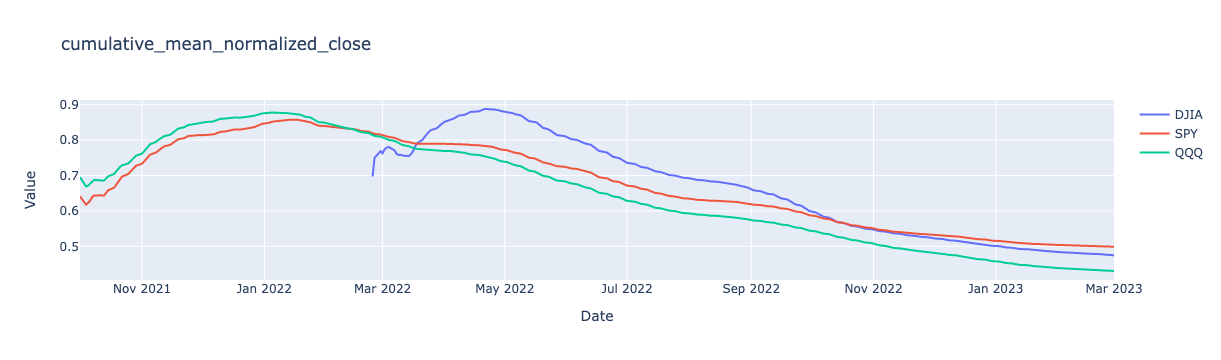

In [37]:
plot.plot_column_across_tickers(df, col_name = 'cumulative_mean_normalized_close', title='cumulative_mean_normalized_close')

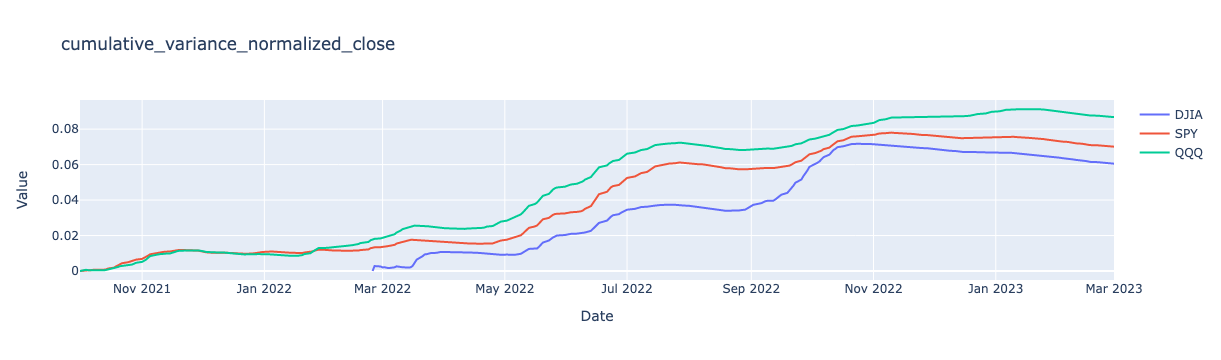

In [38]:
plot.plot_column_across_tickers(df, col_name = 'cumulative_variance_normalized_close', title='cumulative_variance_normalized_close')

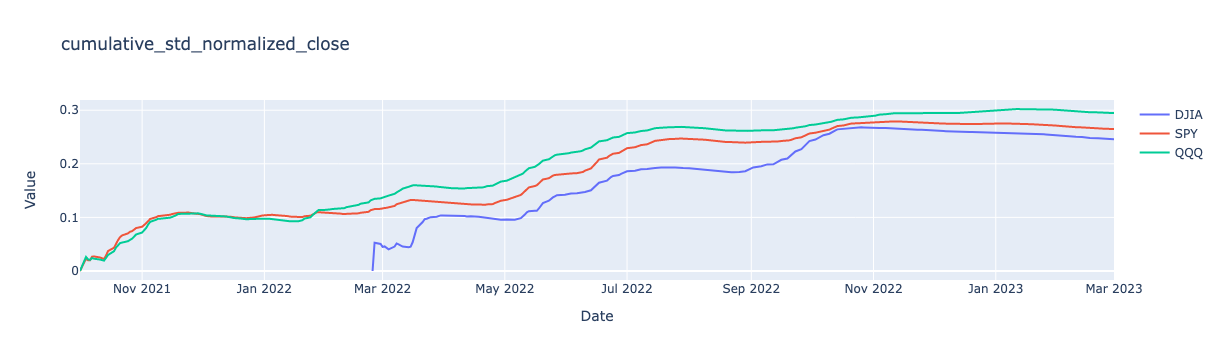

In [39]:
plot.plot_column_across_tickers(df, col_name = 'cumulative_std_normalized_close', title='cumulative_std_normalized_close')

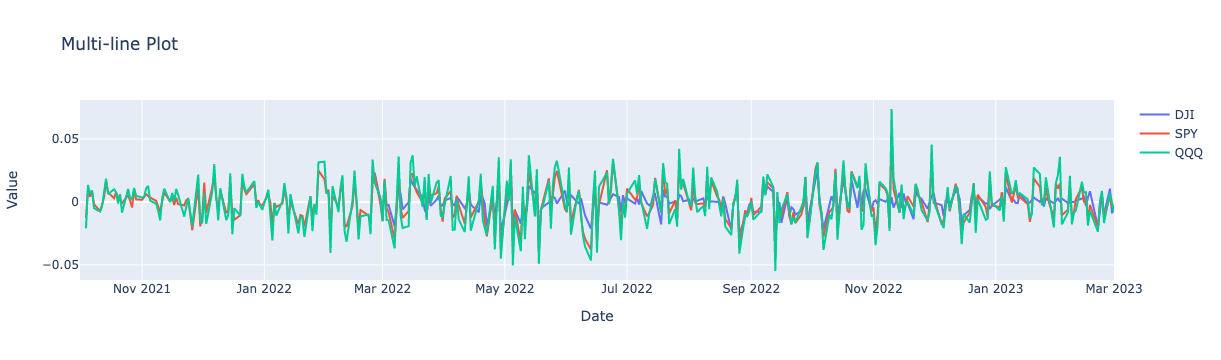

In [40]:
x_data = [list(dji_df.ticker_data.index),list(spy_df.ticker_data.index),list(qqq_df.ticker_data.index)]
y_data = [list(dji_df.ticker_data['pct_change']), list(spy_df.ticker_data['pct_change']), list(qqq_df.ticker_data['pct_change'])]

plot.plot_multi_line_chart(x_data, y_data, labels=['DJI', 'SPY', 'QQQ'])

In [41]:




agg_stats_df = []
tickers = list(df['ticker'].unique())

for i in range(0,len(tickers)):
    temp_df = df[df['ticker']==tickers[i]]
    
    

    price_data = temp_df['Close']
    returns = (price_data / price_data.shift(1)) - 1
    returns = returns.iloc[1:]
    
    VaR = rt.historical_var(returns, confidence_level=0.95)
    cVaR = rt.historical_cvar(returns, confidence_level=0.95)
    
    print(f"Historical VaR :{VaR}")
    print(f"Historical cVaR :{cVaR}")

    agg_stats_df.append(pd.DataFrame({'ticker':[tickers[i]], 'mean':[temp_df['normalized_close'].mean()], 'std_dev':[temp_df['normalized_close'].std()], \
                                     'VaR':[VaR], 'cVaR':[cVaR]}))
    
agg_stats_df = pd.concat(agg_stats_df)
agg_stats_df



Historical VaR :0.018140772427455064
Historical cVaR :0.023249624522148855
Historical VaR :0.0224731239389698
Historical cVaR :0.030868119508232157
Historical VaR :0.03020059807107185
Historical cVaR :0.039746090007874095


,ticker,mean,std_dev,VaR,cVaR
0,DJIA,0.474675,0.246486,0.018141,0.023250
0,SPY,0.498910,0.265183,0.022473,0.030868
0,QQQ,0.430385,0.294989,0.030201,0.039746


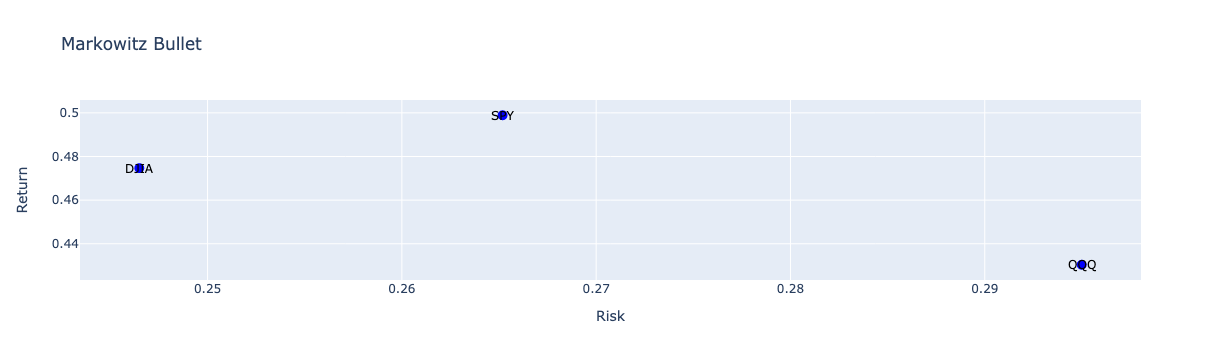

In [42]:
plot.plot_markowitz_bullet(list(agg_stats_df['std_dev']), list(agg_stats_df['mean']), text_vals =list(agg_stats_df['ticker']),  title='Markowitz Bullet', xaxis_title='Risk', yaxis_title='Return')

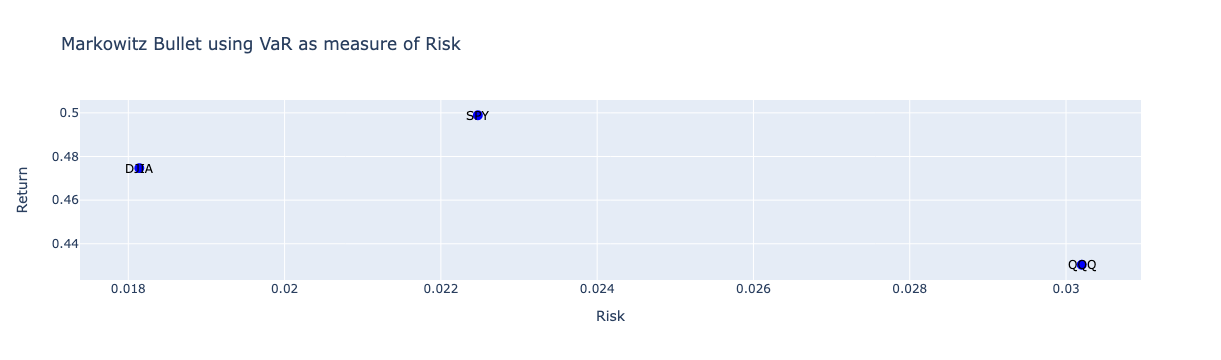

In [43]:
plot.plot_markowitz_bullet(list(agg_stats_df['VaR']), list(agg_stats_df['mean']), text_vals =list(agg_stats_df['ticker']),  title='Markowitz Bullet using VaR as measure of Risk', xaxis_title='Risk', yaxis_title='Return')


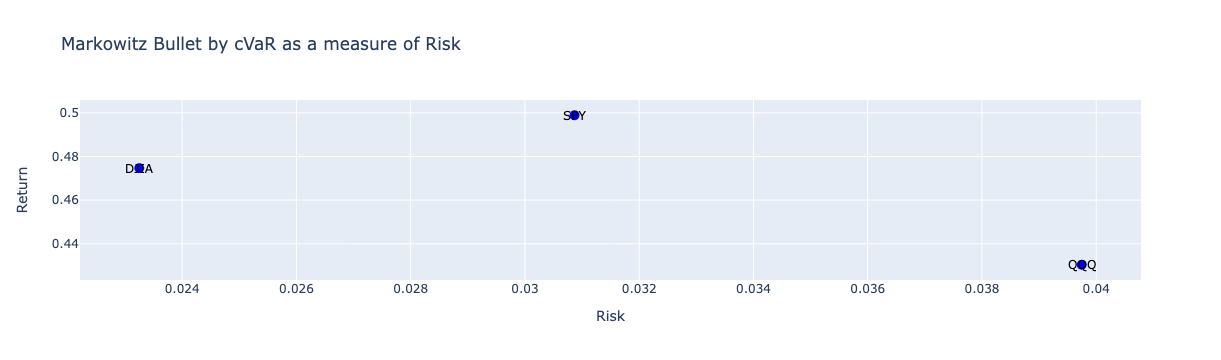

In [44]:
plot.plot_markowitz_bullet(list(agg_stats_df['cVaR']), list(agg_stats_df['mean']), text_vals =list(agg_stats_df['ticker']),  title='Markowitz Bullet by cVaR as a measure of Risk', xaxis_title='Risk', yaxis_title='Return')

/Users/aordorica/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



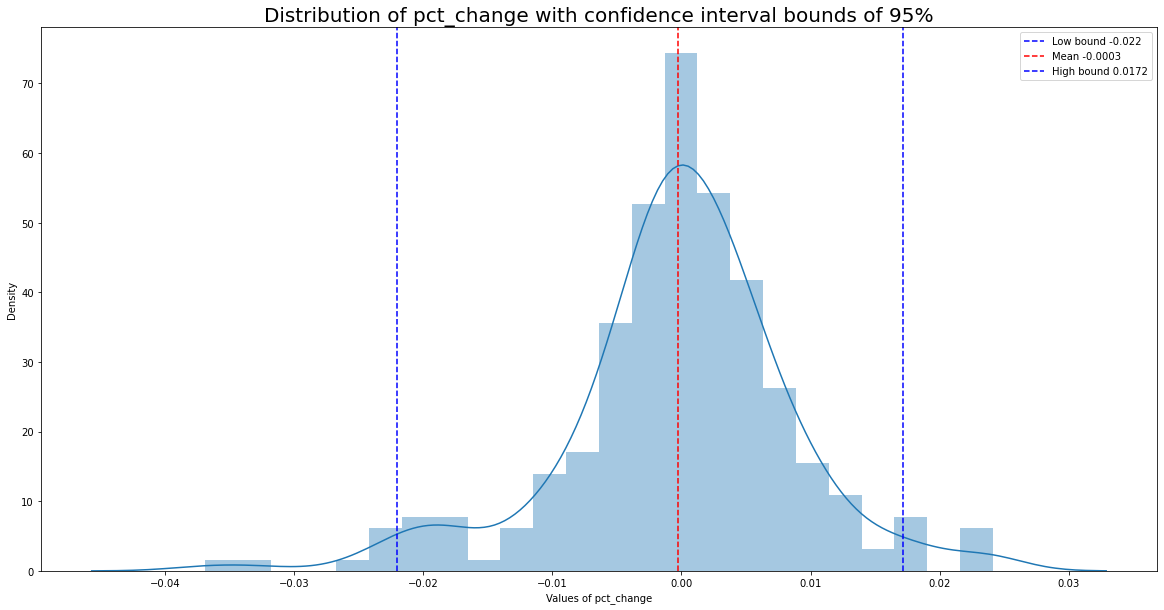

(-0.02196485623003197, -0.0003280961197139268, 0.01723289020187102)

In [45]:
low_bound, mean, high_bound = dt.get_confidence_interval(dji_df.ticker_data, 'pct_change', conf_interval=95)
low_bound, mean, high_bound 

/Users/aordorica/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



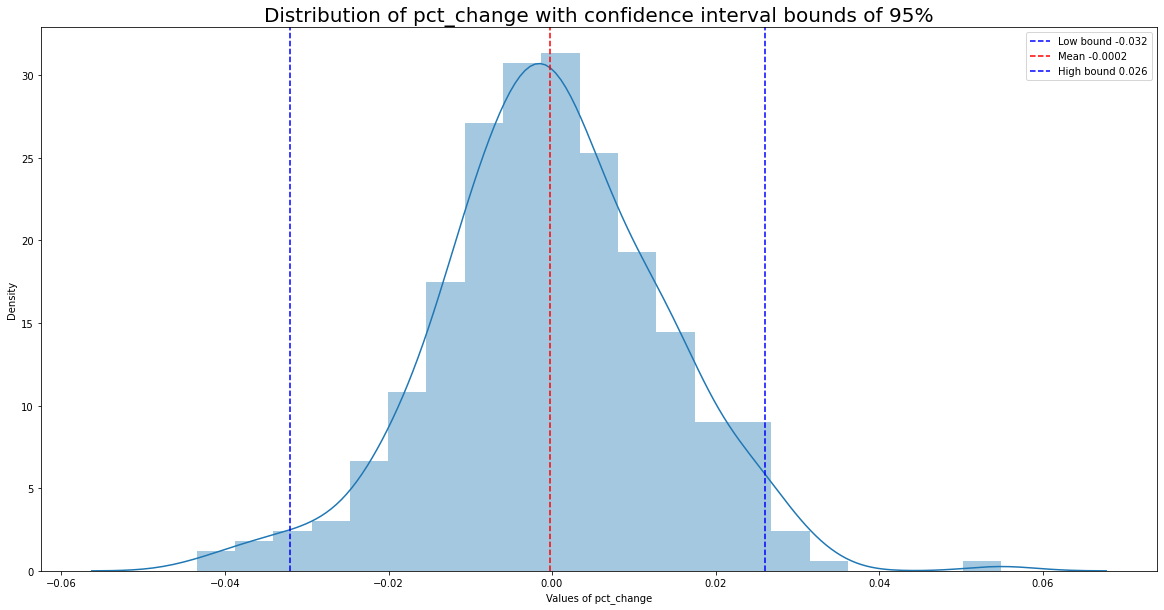

(-0.032017309281859196, -0.0001739742250353411, 0.02596638440481991)

In [46]:
low_bound, mean, high_bound = dt.get_confidence_interval(spy_df.ticker_data, 'pct_change', conf_interval=95)
low_bound, mean, high_bound 

/Users/aordorica/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



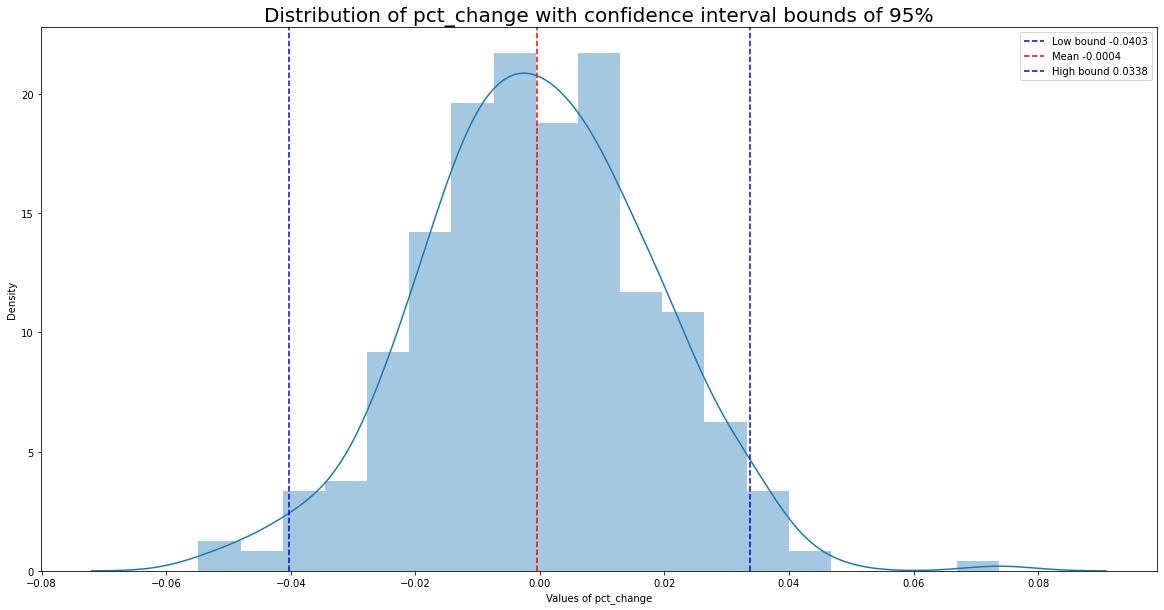

(-0.04034653465346538, -0.0004300706653437035, 0.0338121824226838)

In [47]:
low_bound, mean, high_bound = dt.get_confidence_interval(qqq_df.ticker_data, 'pct_change', conf_interval=95)
low_bound, mean, high_bound 